<a href="https://colab.research.google.com/github/juanmachanes/Portafolio/blob/main/RobotTradingBcAlura/RobotTradingChallenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Configuración del ambiente

In [ ]:
global df_bitcoin, precio_actual, tendencia, media_bitcoin,  algoritmo_decision, df_bitcoin_limpio

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp
algoritmo_decision = ''


In [ ]:
!python -V
print('------')
!pip show Pandas | grep 'Name\|Version'
print('------')
!pip show Numpy | grep 'Name\|Version'
print('------')
!pip show Matplotlib | grep 'Name\|Version'

Python 3.10.12
------
Name: pandas
Version: 1.5.3
------
Name: numpy
Version: 1.23.5
------
Name: matplotlib
Version: 3.7.1


# 2. Extraccion


## Extraccion Datos Historicos
Extraemos los datos historicos de los ultimos 7 dias con un intervarlo de 30 minutos del Bitcoin en Yahoo Finance

In [1]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta
import pytz

def importar_base_bitcoin():
  global df_bitcoin
  # Define el símbolo del ticker para Bitcoin (BTC-USD)
  ticker_symbol = "BTC-USD"

  # Define la zona horaria de Buenos Aires
  zona_horaria_buenos_aires = pytz.timezone('America/Argentina/Buenos_Aires')

  # Obtiene la fecha y hora actual en la zona horaria de Buenos Aires
  end_date = datetime.now()

  # Calcula la fecha de inicio como hace 7 días
  start_date = end_date - timedelta(days=7)


  # Obtiene datos históricos de Yahoo Finance
  df_bitcoin = yf.download(ticker_symbol,interval="5m", start=start_date, end=end_date)

  # Convierte los datos en la zona horaria de Buenos Aires
  df_bitcoin = df_bitcoin.tz_convert(zona_horaria_buenos_aires)














In [2]:
importar_base_bitcoin()
df_bitcoin

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-10-29 14:10:00-03:00,34396.890625,34406.980469,34396.890625,34406.089844,34406.089844,0
2023-10-29 14:15:00-03:00,34409.582031,34463.136719,34409.582031,34463.136719,34463.136719,24214528
2023-10-29 14:20:00-03:00,34446.226562,34446.675781,34433.394531,34446.675781,34446.675781,5182464
2023-10-29 14:25:00-03:00,34447.929688,34461.152344,34447.929688,34461.152344,34461.152344,27614208
2023-10-29 14:30:00-03:00,34461.296875,34483.503906,34460.066406,34483.503906,34483.503906,123904
...,...,...,...,...,...,...
2023-11-05 13:50:00-03:00,34977.593750,34990.343750,34974.988281,34990.343750,34990.343750,2417664
2023-11-05 13:55:00-03:00,34982.968750,34983.988281,34977.289062,34979.707031,34979.707031,11287552
2023-11-05 14:00:00-03:00,34983.378906,34993.101562,34980.992188,34993.101562,34993.101562,2902016


## Extraccion Valor Bitcoin Actual
Extraermos el valor y la tendencia actual del Bitcoin utilizando DataScraping en la pagina CoinMarket

In [ ]:
from bs4 import BeautifulSoup
import requests


def extrer_tendencias():
  global tendencia,precio_actual
  headers = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/118.0'}
  url = "https://coinmarketcap.com/coins/"
  respuesta = requests.get(url,headers=headers)
  data = respuesta.text
  s=BeautifulSoup(data,features="lxml")
  precio_actual = float(s.find('div',{'class':'sc-a0353bbc-0'}).get_text().replace(',','').replace('$',''))
  tend = str(s.find('span',{'class':'sc-d55c02b-0'})).split('icon-Caret-')[1].split('"')[0]

  if tend == 'up':
    tendencia = "alta"
  elif tend == 'down':
    tendencia = "baja"


extrer_tendencias()
print(precio_actual,tendencia)


30927.88 alta


# 3. Limpieza de Datos
Cabe aclarar que pudmos ver que no hay:
- valores nulos en la columna Close
- no hay valores con indice duplicado

##### Pero igualmente los tratamos

## Copia del DF original

In [ ]:

  df_bitcoin_limpio = df_bitcoin.copy()
  df_bitcoin_limpio.info()



<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2015 entries, 2023-10-16 13:30:00-03:00 to 2023-10-23 13:25:00-03:00
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2015 non-null   float64
 1   High       2015 non-null   float64
 2   Low        2015 non-null   float64
 3   Close      2015 non-null   float64
 4   Adj Close  2015 non-null   float64
 5   Volume     2015 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 110.2 KB


## Eliminamos los valores que tienen Valor Volume menor a cero
Obteniendo el valor min y viendo que no es 0 podemos decir que elimino los menores o iguales a 0

In [ ]:
seleccion = df_bitcoin_limpio['Volume']>0
df_bitcoin_limpio = df_bitcoin_limpio[seleccion]
df_bitcoin_limpio
df_bitcoin_limpio['Volume'].min()

1024

## Eliminamos los valores que tienen Null en Close

In [ ]:
df_bitcoin_limpio.dropna(subset = ['Close'], inplace = True)
df_bitcoin_limpio

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-10-16 13:35:00-03:00,28093.830078,28101.746094,28093.830078,28101.746094,28101.746094,154509312
2023-10-16 13:40:00-03:00,28144.013672,28144.013672,28094.859375,28094.859375,28094.859375,39122944
2023-10-16 13:45:00-03:00,28102.837891,28121.666016,28102.837891,28121.666016,28121.666016,14596096
2023-10-16 13:50:00-03:00,28121.666016,28134.105469,28116.107422,28132.490234,28132.490234,25473024
2023-10-16 13:55:00-03:00,28132.490234,28132.490234,28091.921875,28097.859375,28097.859375,23310336
...,...,...,...,...,...,...
2023-10-23 13:05:00-03:00,30879.093750,30962.740234,30879.093750,30962.740234,30962.740234,50841600
2023-10-23 13:10:00-03:00,30965.488281,30976.443359,30930.960938,30930.960938,30930.960938,93519872
2023-10-23 13:15:00-03:00,30921.050781,30985.527344,30921.050781,30985.527344,30985.527344,40785920


## Eliminamos las filas que tienen indice repetido

In [ ]:
indices_inicos = df_bitcoin_limpio.index.drop_duplicates()
df_bitcoin_limpio = df_bitcoin_limpio.reindex(indices_inicos)

## Limpieza de los outside en los valores de Close

<Axes: >

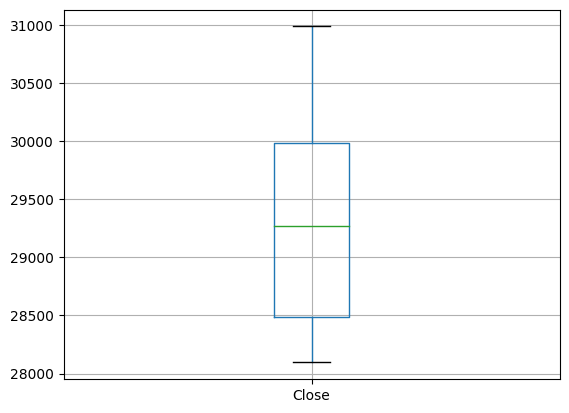

In [ ]:
df_bitcoin_limpio.boxplot(['Close'])

<Axes: >

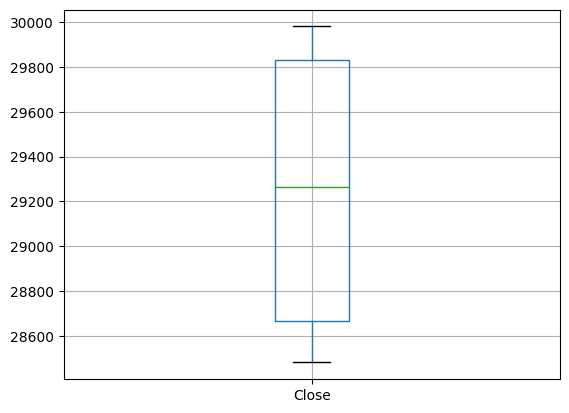

In [ ]:
close = df_bitcoin_limpio['Close']
Q1 = close.quantile(.25)
Q3 = close.quantile(.75)
seleccion = (close >= Q1) & (close <= Q3)
df_bitcoin_limpio = df_bitcoin_limpio[seleccion]
df_bitcoin_limpio.boxplot(['Close'])

## Funcion Completa

In [ ]:

def limpieza_datos():
  global media_bitcoin,df_bitcoin
  df_bitcoin_limpio = df_bitcoin.copy()
  seleccion = df_bitcoin_limpio['Volume']>0
  df_bitcoin_limpio = df_bitcoin_limpio[seleccion]
  df_bitcoin_limpio.dropna(subset = ['Close'], inplace = True)
  indices_inicos = df_bitcoin_limpio.index.drop_duplicates()
  df_bitcoin_limpio = df_bitcoin_limpio.reindex(indices_inicos)
  close = df_bitcoin_limpio['Close']
  Q1 = close.quantile(.25)
  Q3 = close.quantile(.75)
  seleccion = (close >= Q1) & (close <= Q3)
  df_bitcoin_limpio = df_bitcoin_limpio[seleccion]
  media_bitcoin = df_bitcoin_limpio['Close'].mean()
limpieza_datos()



# 4. Toma de Decision
- Si el precio actual es mayor o igual a la media y la tendencia es baja--> vender
- Si el precio actual es menor a la media y la tendencia es alta --> comprar
- Otras posibilidades --> esperar

In [ ]:
def tomar_decision():
  global algoritmo_decision, media_bitcoin
  if precio_actual>=media_bitcoin and tendencia == 'baja':
    algoritmo_decision = 'Vender'
  elif precio_actual<media_bitcoin and tendencia == 'alta':
    algoritmo_decision = 'Comprar'
  else:
    algoritmo_decision = 'Esperar'


# 5. Visualizacion

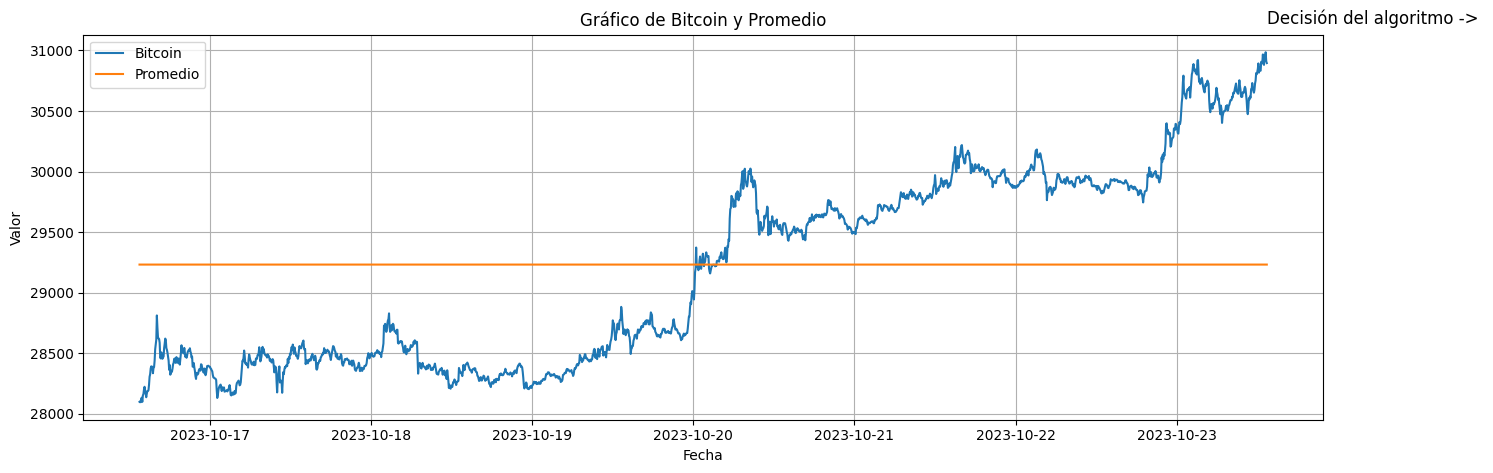

In [ ]:


import matplotlib.pyplot as plt
def visualizacion():
    global algoritmo_decision
    # Adiciona una nueva columna 'Promedio' al DataFrame original
    df_bitcoin['Promedio'] = media_bitcoin

    # Configura el tamaño del gráfico en una proporción de 16x5
    plt.figure(figsize=(16, 5))

    # Adiciona un título al gráfico
    plt.title('Gráfico de Bitcoin y Promedio')
    # Dibuja una línea en el gráfico con los datos del índice y la columna 'Close'
    plt.plot(df_bitcoin.index, df_bitcoin['Close'], label='Bitcoin')

    # Dibuja una línea en el gráfico con los datos del índice y la columna 'Promedio'
    plt.plot(df_bitcoin.index, df_bitcoin['Promedio'], label='Promedio')
    # Puedes ajustar las coordenadas x y y para la ubicación del mensaje
     # Configura las coordenadas para la esquina superior derecha del gráfico
    corner_x = df_bitcoin.index[-1]  # Última fecha en los datos
    corner_y = max(df_bitcoin[['Close', 'Promedio']].max())  # Valor máximo entre 'Close' y 'Promedio'

    # x_min = fecha_inicial
    # x_max = fecha_final
    # plt.xlim(x_min, x_max)

    # Configura las coordenadas xy y el texto a mostrar
    plt.annotate('Decisión del algoritmo -> ' + algoritmo_decision,
                 xy=(corner_x, corner_y),  # Coordenadas en la esquina superior derecha
                 xytext=(-0, 20),  # Ajusta la posición del texto
                 textcoords='offset points',  # Configura el ajuste relativo a las coordenadas
                 fontsize=12)

    # Muestra en pantalla el gráfico configurado
    plt.legend()  # Mostrar leyenda
    plt.xlabel('Fecha')  # Etiqueta del eje x
    plt.ylabel('Valor')  # Etiqueta del eje y
    plt.grid(True)  # Mostrar cuadrícula
    plt.show()

# Llama a la función para visualizar el gráfico
visualizacion()


df

# 6. Automatizacion

[*********************100%%**********************]  1 of 1 completed
Fecha y hora 2023-10-23 18:28:30.755884-03:00
Precio Actual Bitcoin->31532.9
Tendencia->baja
Valore Medio del Bitcoin->29382.87558520599
Desicion->Vender


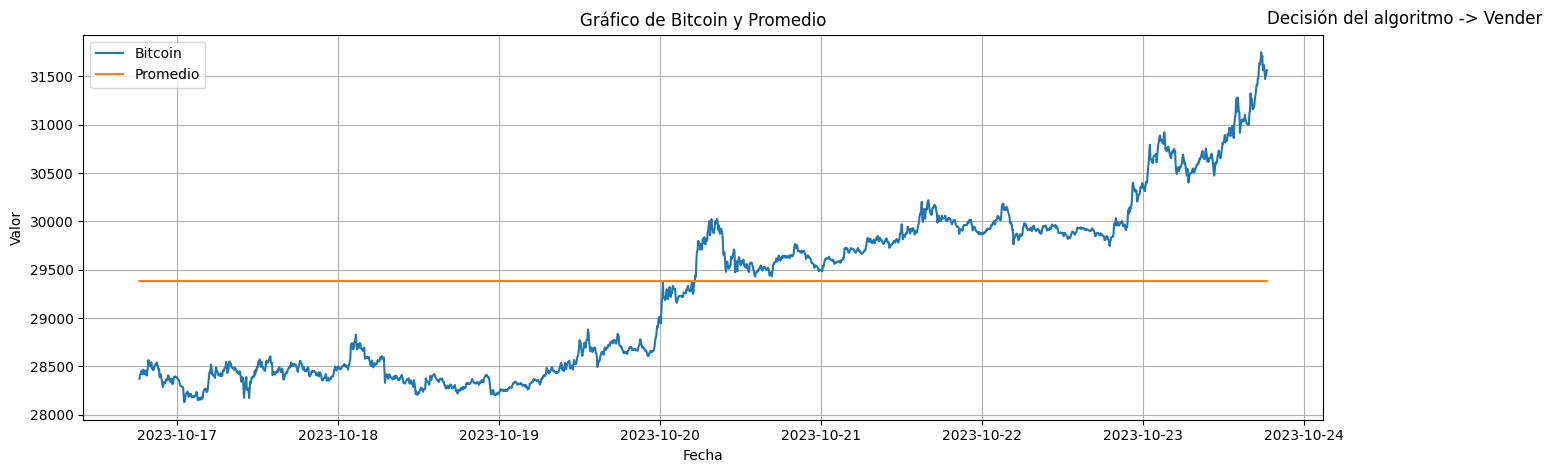

In [ ]:
from IPython.core.display import clear_output
import time
while(True):
  clear_output()
  importar_base_bitcoin()
  extrer_tendencias()
  limpieza_datos()
  tomar_decision()
  print("Fecha y hora " + str(datetime.now(pytz.timezone('America/Argentina/Buenos_Aires'))))
  print( "Precio Actual Bitcoin->"+str(precio_actual))
  print("Tendencia->"+tendencia)
  print("Valor Medio del Bitcoin->"+str(media_bitcoin))
  print("Desicion->"+algoritmo_decision)
  visualizacion()
  time.sleep(300)